# Descriptive Statistics


:::{note}
These instructions .. 
:::





A fundamental part of working with data is _**describing**_ it. Descriptive statistics help simplify and summarize large amounts of data in a sensible manner. In this lecture, we will discuss __descriptive statistics__ and cover a variety of methods for __summarizing, describing, and representing__ datasets in Python. 

We will use the [http://54.243.252.9/engr-1330-webroot/4-Databases/HighestGrossingMovies.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/HighestGrossingMovies.csv) dataset as an illustrative example. Let's have a look at it first.

In [1]:
#Import the necessary external packages
import numpy as np
import pandas as pd
import requests

In [2]:
# put script here to download file from server
remote_url="http://54.243.252.9/engr-1330-webroot/4-Databases/HighestGrossingMovies.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('HighestGrossingMovies.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
#

Movies = pd.read_csv("HighestGrossingMovies.csv")         #Dataset of the Top10 highest-grossing films as of 2019 (adjusted for inflation)
                                                          #5 columns (Movie, Director, Year, Budget, Gross) and 10 rows
Movies

,Movie,Director,Year,Budget_million$,Gross_million$
0,Gone with the Wind,Victor Fleming,1939,3.9,3706
1,Avatar,James Cameron,2009,237.0,3257
2,Titanic,James Cameron,1997,200.0,3081
3,Star Wars,George Lucas,1977,11.0,3043
4,Avengers: Endgame,Joe & Anthony Russo,2019,356.0,2798
5,The Sound of Music,Robert Wise,1965,8.2,2549
6,E.T. the Extra-Terrestrial,Steven Spielberg,1982,10.5,2489
7,The Ten Commandments,Cecil B. DeMille,1956,13.0,2356
8,Doctor Zhivago,David Lean,1965,11.0,2233
9,Star Wars: The Force Awakens,J.J. Abrams,2015,306.0,2202


Here is an overall look at some but not all of  measures we will be discussing today:
![](https://slideplayer.com/slide/2346765/8/images/2/Summary+Measures+Describing+Data+Numerically+Central+Tendency.jpg)


## Measures of Central Tendency

Centrality measures give us an estimate of the center of a distribution and a sense of a typical value we would expect to see. <br>
The three major measures of center include __*the mean, median, and mode*__.

### <font color=crimson>Arithmetic Mean</font>

The arithmetic mean (average, or simply mean) is the sum of all the values, divided by the number of values. The mean represents a typical value that acts as a yardstick for all observations.
![](https://x-engineer.org/wp-content/uploads/2016/10/Arithmetic-mean-formula-244x142.jpg?a43cfa&a43cfa)

Let's calculate the average budget of the Top10 highest-grossing films. 

In [3]:
Budget = Movies['Budget_million$']
Budget

0      3.9
1    237.0
2    200.0
3     11.0
4    356.0
5      8.2
6     10.5
7     13.0
8     11.0
9    306.0
Name: Budget_million$, dtype: float64

We can use primitive python to calculate the mean of set of numbers:

In [4]:
# Create a list of all the numbers:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
mean1 = sum(budget) / len(budget)
print("The average budget of the Top10 highest-grossing films is ",mean1,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


We can also utilize a variety of external libraries. (You may find some of them familiar!)

In [5]:
# The usual suspects!
import numpy as np
import pandas as pd
# Also, these two libraries offer useful functions for descriptive statistics
import statistics
import scipy.stats

In [6]:
# Read the column of interest from the Movies dataframe
Budget = Movies['Budget_million$']
# Use the mean function from the Pandas library
mean2 = Budget.mean()
print("The average budget of the Top10 highest-grossing films is ",mean2,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


In [7]:
# Read the column of interest from the Movies dataframe
Budget = Movies['Budget_million$']
# Use the mean function from the Numpy library
mean3 = np.mean(Budget)
print("The average budget of the Top10 highest-grossing films is ",mean3,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


In [8]:
# Read the column of interest from the Movies dataframe
Budget = Movies['Budget_million$']
# Use the mean function from the statistics library
mean4 = statistics.mean(Budget)
print("The average budget of the Top10 highest-grossing films is ",mean4,"million USD")

The average budget of the Top10 highest-grossing films is  115.66 million USD


A few other types of means are described below - these are specialized and used for particular applications (outside the scope of this course)

#### Harmonic Mean

The harmonic mean is the reciprocal of the mean of the reciprocals of all items in the dataset.

![](https://www.onlinemath4all.com/images/harmonicmean1.png)

Let's calculate the harmonic mean for the same set of numbers:

In [9]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
hmean1 = len(budget) / sum(1 / item for item in budget)
hmean1 = round(hmean1,2)
print("The harmonic mean of the budget of the Top10 highest-grossing films is ",hmean1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
hmean2 = statistics.harmonic_mean(Budget)
hmean2 = round(hmean2,2)
print("The harmonic mean of the budget of the Top10 highest-grossing films is ",hmean2,"million USD")

# via the scipy.stats library:
Budget = Movies['Budget_million$']
hmean3 = scipy.stats.hmean(Budget)
hmean3 = round(hmean3,2)
print("The harmonic mean of the budget of the Top10 highest-grossing films is ",hmean3,"million USD")

The harmonic mean of the budget of the Top10 highest-grossing films is  13.38 million USD
The harmonic mean of the budget of the Top10 highest-grossing films is  13.38 million USD
The harmonic mean of the budget of the Top10 highest-grossing films is  13.38 million USD


#### Geometric Mean

The geometric mean is the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset.

![](https://ncalculators.com/images/formulas/geometric-mean.jpg)

Let's calculate the geometric mean for the same set of numbers:

In [10]:
# Primitive Python: -it is getting more lengthy and labour-intensive
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]

gmean1 = 1
for item in budget:
     gmean1 *= item

gmean1 **= 1 / len(budget)
gmean1 = round(gmean1,2)
print("The geometric mean of the budget of the Top10 highest-grossing films is ",gmean1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
gmean2 = statistics.geometric_mean(Budget)
gmean2 = round(gmean2,2)

print("The geometric mean of the budget of the Top10 highest-grossing films is ",gmean2,"million USD")

# via the scipy.stats library:
Budget = Movies['Budget_million$']
gmean3 = scipy.stats.gmean(Budget)
gmean3 = round(gmean3,2)

print("The geometric mean of the budget of the Top10 highest-grossing films is ",gmean3,"million USD")

The geometric mean of the budget of the Top10 highest-grossing films is  34.96 million USD
The geometric mean of the budget of the Top10 highest-grossing films is  34.96 million USD
The geometric mean of the budget of the Top10 highest-grossing films is  34.96 million USD


#### <font color=darkorange>Arithmetic or Geometric or Harmonic?- How to be Mean!</font>
![](https://pbs.twimg.com/media/Dm2BdG2V4AE36xP.jpg)


- If values have the same units: Use the arithmetic mean. <br>
- If values have differing units: Use the geometric mean. | Also, commonly used for growth rates, like population growth or interest rates.<br>
- If values are rates: Use the harmonic mean. <br>

__If you are interested in knowing more about these 3 and their differences, you may find these interesting:__


#### <font color=crimson>Median</font>

Median is the middle element of a sorted dataset. The value where the upper half of the data lies above it and lower half lies below it. In other words, it is the middle value of a data set. To calculate the median, arrange the data points in the increasing (or decreasing) order and the middle value is the median. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.
Let's find the median of the gross of the Top10 highest-grossing films: 

In [11]:
Gross = Movies['Gross_million$']
Gross

0    3706
1    3257
2    3081
3    3043
4    2798
5    2549
6    2489
7    2356
8    2233
9    2202
Name: Gross_million$, dtype: int64

We can use primitive python to calculate the median of a set of numbers:

In [12]:
# Create a list of all the numbers:
gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202]
n = len(gross)
if n % 2:
     median1 = sorted(gross)[round(0.5*(n-1))]
else:
     gross_ord, index = sorted(gross), round(0.5 * n)
     median1 = 0.5 * (gross_ord[index-1] + gross_ord[index])

print("The median of gross of the Top10 highest-grossing films is ",median1,"million USD")

The median of gross of the Top10 highest-grossing films is  2673.5 million USD


We can use also use external libraries:

In [13]:
#via the Pandas library:
Gross = Movies['Gross_million$']
median2 = Gross.median()
print("The median of gross of the Top10 highest-grossing films is ",median2,"million USD")

#via the Numpy library:
Gross = Movies['Gross_million$']
median3 = np.median(Gross)
print("The median of gross of the Top10 highest-grossing films is ",median3,"million USD")

#via the Statistics library:
Gross = Movies['Gross_million$']
median4 = statistics.median(Gross)
print("The median of gross of the Top10 highest-grossing films is ",median4,"million USD")
#2 more functions from the same library- For even number of cases:
print("low median :",statistics.median_low(Gross))
print("high median :",statistics.median_high(Gross))

The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
The median of gross of the Top10 highest-grossing films is  2673.5 million USD
low median : 2549
high median : 2798


The main difference between the behavior of the mean and median is related to dataset outliers or extremes. The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at all. You can compare the mean and median as one way to detect outliers and asymmetry in your data. Whether the mean value or the median value is more useful to you depends on the context of your particular problem. The mean is a better choice when there are no extreme values that can affect it. It is a better summary because the information from every observation is included rather than median, which is just the middle value. However, in the presence of outliers, median is considered a better alternative. Check this out:

In [14]:
newgross = [99999,3257,3081,3043,2798,2549,2489,2356,2233,2202] #We have replaced 3706 with 99999- an extremely high number (an outlier)
newmean = np.mean(newgross)
newmedian = np.median(newgross)
print(newmean)   #A huge change from the previous value (115.66) - Mean is very sensitive to outliers and extreme values
print(newmedian) #No Change- the median only depends on outliers either slightly or not at all. 

12400.7
2673.5


To read more about the differences of mean and median, check these out:
- "Stuck in the middle – mean vs. median"
, available @ https://www.clinfo.eu/mean-median/

- "Mean vs Median: When to Use Which Measure?"
, available @ https://www.datascienceblog.net/post/basic-statistics/mean_vs_median/

- "Mean vs. Median"
by __*AnswerMiner*__, available @ https://www.answerminer.com/blog/mean-vs-median

#### <font color=crimson>Mode</font>

The value that occurs the most number of times in our data set. Closely tied to the concept of frequency, mode provides information on the most recurrent elements in a dataset. When the mode is not unique, we say that the data set is bimodal, while a data set with more than two modes is multimodal. Let's find the mode in the gross of the Top10 highest-grossing films:

In [15]:
# In primitive Python:
# Create a list of all the numbers:
gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202]
mode1 = max((gross.count(item), item) for item in gross)[1]
print(mode1) #Since each item is repeated only once, only the first element is printed- This is a multimodal set. 

#via the Pandas library:
Gross = Movies['Gross_million$']
mode2 = Gross.mode()
print(mode2) #Returns all modal values- This is a multimodal set. 

#via the Statistics library:
Gross = Movies['Gross_million$']
mode3 = statistics.mode(Gross)
print(mode3) #Return a single value
mode4 = statistics.multimode(Gross)
print(mode4) #Returns a list of all modes

#via the scipy.stats library:
Gross = Movies['Gross_million$']
mode5 = scipy.stats.mode(Gross)
print(mode5) #Returns the object with the modal value and the number of times it occurs- If multimodal: only the smallest value

3706
0    2202
1    2233
2    2356
3    2489
4    2549
5    2798
6    3043
7    3081
8    3257
9    3706
dtype: int64
3706
[3706, 3257, 3081, 3043, 2798, 2549, 2489, 2356, 2233, 2202]
ModeResult(mode=array([2202]), count=array([1]))


Mode is not useful when our distribution is flat; i.e., the frequencies of all groups are similar. Mode makes sense when we do not have a numeric-valued data set which is required in case of the mean and the median. For instance:

In [16]:
Director = Movies['Director']
# via statistics:
mode6 = statistics.mode(Director)
print(mode6) #"James Cameron" with two films (x2 repeats) is the mode
# via pandas:
mode7 = Director.mode()
print(mode7) #"James Cameron" with two films (x2 repeats) is the mode

James Cameron
0    James Cameron
dtype: object


### <font color=red>Measures of Dispersion</font>

Measures of dispersion are values that describe how the data varies. It gives us a sense of how much the data tends to diverge from the typical value. Aka measures of variability, they quantify the spread of data points.The major measures of dispersion include __*range, percentiles, inter-quentile range, variance, standard deviation, skeness and kurtosis*__.

#### <font color=crimson>Range</font>

The range gives a quick sense of the spread of the distribution to those who require only a rough indication of the data. There are some disadvantages of using the range as a measure of spread. One being it does not give any information of the data in between maximum and minimum. Also, the range is very sensitive to extreme values. Let's calculate the range for the budget of the Top10 highest-grossing films: 

In [17]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
range1 = max(budget)-min(budget)
print("The range of the budget of the Top10 highest-grossing films is ",range1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
range2 = np.ptp(Budget) #ptp stands for Peak To Peak
print("The range of the budget of the Top10 highest-grossing films is ",range2,"million USD")

The range of the budget of the Top10 highest-grossing films is  352.1 million USD
The range of the budget of the Top10 highest-grossing films is  352.1 million USD


#### <font color=crimson>Percentiles and Quartiles</font>

A measure which indicates the value below which a given percentage of points in a dataset fall. The sample 𝑝 percentile is the element in the dataset such that 𝑝% of the elements in the dataset are less than or equal to that value. Also, (100 − 𝑝)% of the elements are greater than or equal to that value. For example, median represents the 50th percentile. Similarly, we can have 0th percentile representing the minimum and 100th percentile representing the maximum of all data points. Percentile gives the relative position of a particular value within the dataset. It also helps in comparing the data sets which have different means and deviations.
Each dataset has three quartiles, which are the percentiles that divide the dataset into four parts:

- The first quartile (Q1) is the sample 25th percentile. It divides roughly 25% of the smallest items from the rest of the dataset.
- The second quartile Q2) is the sample 50th percentile or the median. Approximately 25% of the items lie between the first and second quartiles and another 25% between the second and third quartiles.
- The third quartile (Q3) is the sample 75th percentile. It divides roughly 25% of the largest items from the rest of the dataset.

In [18]:
Budget = Movies['Budget_million$']
#via Numpy:
p10 = np.percentile(Budget, 10) #returns the 10th percentile
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10)
p4070 = np.percentile(Budget, [40,70]) #returns the 40th and 70th percentile
print("The 40th and 70th percentile of the budget of the Top10 highest-grossing films are ",p4070)
#via Pandas:
p10n = Budget.quantile(0.10) #returns the 10th percentile - notice the difference from Numpy
print("The 10th percentile of the budget of the Top10 highest-grossing films is ",p10n)
#via Statistics:
Qs = statistics.quantiles(Budget, n=4, method='inclusive')     #The parameter n defines the number of resulting equal-probability percentiles: 
                                                               #n=4 returns the quartiles | n=2 returns the median
print("The quartiles of the budget of the Top10 highest-grossing films is ",Qs)

The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The 40th and 70th percentile of the budget of the Top10 highest-grossing films are  [ 11.  211.1]
The 10th percentile of the budget of the Top10 highest-grossing films is  7.77
The quartiles of the budget of the Top10 highest-grossing films is  [10.625, 12.0, 227.75]


#### <font color=crimson>InterQuartile Range (IQR)</font>

IQR is the difference between the third quartile and the first quartile (Q3-Q1). The interquartile range is a better option than range because it is not affected by outliers. It removes the outliers by just focusing on the distance within the middle 50% of the data.

In [19]:
Budget = Movies['Budget_million$']
#via Numpy:
IQR1 = np.percentile(Budget, 75) -np.percentile(Budget, 25)    #returns the IQR = Q3-Q1 = P75-P25
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR1)
#via scipy.stats:
IQR2 = scipy.stats.iqr(Budget)    #returns the IQR- Can be used for other percentile differences as well >> iqr(object, rng=(p1, p2))
print("The IQR of the budget of the Top10 highest-grossing films is ",IQR2)

The IQR of the budget of the Top10 highest-grossing films is  217.125
The IQR of the budget of the Top10 highest-grossing films is  217.125


#### <font color=crimson>The Five-number Summary</font>

A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a large data set. A summary consists of five values: the most extreme values in the data set (the maximum and minimum values), the lower and upper quartiles, and the median. Five-number summary can be used to describe any data distribution. Boxplots are extremely useful graphical representation of the 5-number summary that we will discuss later.

In [20]:
Budget = Movies['Budget_million$']
Budget.describe()     #Remember this jewel from Pandas? -It directly return the 5-number summary AND MORE!

count     10.000000
mean     115.660000
std      142.739991
min        3.900000
25%       10.625000
50%       12.000000
75%      227.750000
max      356.000000
Name: Budget_million$, dtype: float64

Boxplots are extremely useful graphical representation of the 5-number summary. It can show the range, interquartile range, median, mode, outliers, and all quartiles.

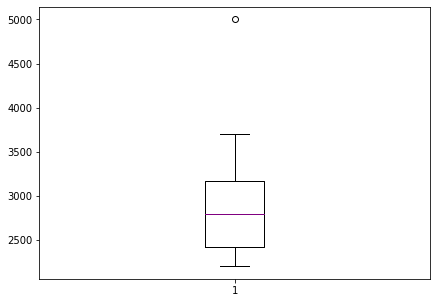

In [21]:
import matplotlib.pyplot as plt  #Required for the plot

gross = [3706,3257,3081,3043,2798,2549,2489,2356,2233,2202,5000] #same data + an outlier: 5000

fig = plt.figure(figsize =(7, 5))
plt.boxplot(gross,medianprops={'linewidth': 1, 'color': 'purple'})

plt.show()

#### <font color=crimson>Variance</font>

The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean. The observations may or may not be meaningful if observations in data sets are highly spread. Let's calculate the variance for budget of the Top10 highest-grossing films.

![](https://miro.medium.com/max/666/0*ovSFlxj9RJMgtQoX.png)

Note that if we are working with the entire population (and not the sample), the denominator should be "n" instead of "n-1".

Note that if we are working with the entire population (and not the sample), the denominator should be "n" instead of "n-1".

In [22]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var1 = sum((item - mean)**2 for item in budget) / (n - 1)
print("The variance of the budget of the Top10 highest-grossing films is ",var1)

# via the Statistics library:
Budget = Movies['Budget_million$']
var2 = statistics.variance(Budget)
print("The variance of the budget of the Top10 highest-grossing films is ",var2)

The variance of the budget of the Top10 highest-grossing films is  20374.70488888889
The variance of the budget of the Top10 highest-grossing films is  20374.70488888889


#### <font color=crimson>Standard Deviation</font>

The sample standard deviation is another measure of data spread. It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. The standard deviation is often more convenient than the variance because it has the same unit as the data points.

![](https://cdn.kastatic.org/googleusercontent/N8xzWFc6eo0XBHEXZjz1SwvLSnPezvhTRF1P17kdjUG_tnJivGKkyCxbwVe4MZ0-USOxIZBohgcjdi8e7Z4Hswcqfw)


In [23]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
sd1 = var**0.5
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd1,"million USD")

# via the Statistics library:
Budget = Movies['Budget_million$']
sd2 = statistics.stdev(Budget)
print("The standard deviation of the budget of the Top10 highest-grossing films is ",sd2,"million USD")

The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD
The standard deviation of the budget of the Top10 highest-grossing films is  142.73999050332353 million USD


### <font color=crimson>Skewness</font>

The sample skewness measures the asymmetry of a data sample. There are several mathematical definitions of skewness. The Fisher-Pearson standardized moment coefficient is calculated by using mean, median and standard deviation of the data. 

![](https://miro.medium.com/max/560/1*B-n9Ujb_IPggKO9P52jrDA.png)

Usually, negative skewness values indicate that there’s a dominant tail on the left side. Positive skewness values correspond to a longer or fatter tail on the right side. If the skewness is close to 0 (for example, between −0.5 and 0.5), then the dataset is considered quite symmetrical.

In [24]:
# Primitive Python:
budget = [3.9,237,200,11,356,8.2,10.5,13,11,306]
n = len(budget)
mean = sum(budget) / n
var = sum((item - mean)**2 for item in budget) / (n - 1)
std = var**0.5
skew1 = (sum((item - mean)**3 for item in budget)
         * n / ((n - 1) * (n - 2) * std**3))
print("The skewness of the budget of the Top10 highest-grossing films is ",skew1)

# via the scipy.stats library:
Budget = Movies['Budget_million$']
skew2 = scipy.stats.skew(Budget, bias=False)
print("The skewness of the budget of the Top10 highest-grossing films is ",skew2)

# via the Pandas library:
Budget = Movies['Budget_million$']
skew3 = Budget.skew()
print("The skewness of the budget of the Top10 highest-grossing films is ",skew3)

The skewness of the budget of the Top10 highest-grossing films is  0.7636547490528159
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816
The skewness of the budget of the Top10 highest-grossing films is  0.763654749052816


### <font color=crimson>Kurtosis</font>

Kurtosis describes the peakedness of the distribution. In other words, Kurtosis identifies whether the tails of a given distribution contain extreme values. While Skewness essentially measures the symmetry of the distribution, kurtosis determines the heaviness of the distribution tails.

![](https://miro.medium.com/max/2220/1*-UQjlHtFyW6m5gcyZ6db2A.png)

If the distribution is tall and thin it is called a leptokurtic distribution. Values in a leptokurtic distribution are near the mean or at the extremes. A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic distribution. A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic distribution. 

In [25]:
# via the scipy.stats library:
Budget = Movies['Budget_million$']
Kurt = scipy.stats.kurtosis(Budget)
print("The kurtosis of the budget of the Top10 highest-grossing films is ",Kurt) #a platykurtic distribution | the tails are heavy


The kurtosis of the budget of the Top10 highest-grossing films is  -1.3110307923262225


## References

- "Descriptive statistics with Python-NumPy"
by __*Rashmi Jain*__, available @ https://www.hackerearth.com/blog/developers/descriptive-statistics-python-numpy/.

- "Python Statistics Fundamentals: How to Describe Your Data"
by __*Mirko Stojiljković *__, available @ https://realpython.com/python-statistics/.

- "A Quick Guide on Descriptive Statistics using Pandas and Seaborn"
by __*Bee Guan Teo*__, available @ https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32.

- "Tutorial: Basic Statistics in Python — Descriptive Statistics"
, available @ https://www.dataquest.io/blog/basic-statistics-with-python-descriptive-statistics/.

- "Mode: A statistical measure of central tendency"
, available @ https://corporatefinanceinstitute.com/resources/knowledge/other/mode/

- "When to use each measure of Central Tendency"
, available @ https://courses.lumenlearning.com/introstats1/chapter/when-to-use-each-measure-of-central-tendency/

- "Mean, Median, Mode: What They Are, How to Find Them"
, available @ https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

- "Arithmetic, Geometric, and Harmonic Means for Machine Learning Arithmetic, Geometric, and Harmonic Means for Machine Learning" by __*Jason Brownlee*__, available @ https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/#:~:text=The%20arithmetic%20mean%20is%20appropriate,with%20different%20measures%2C%20called%20rates.

- "On Average, You’re Using the Wrong Average: Geometric & Harmonic Means in Data Analysis"
by __*Daniel McNichol*__, available @ https://towardsdatascience.com/on-average-youre-using-the-wrong-average-geometric-harmonic-means-in-data-analysis-2a703e21ea0

- "Find a Five-Number Summary in Statistics: Easy Steps"
, available @ https://www.statisticshowto.com/how-to-find-a-five-number-summary-in-statistics/

- "The Five-Number Summary"
, available @ https://www.purplemath.com/modules/boxwhisk2.htm

- "What Is the 5 Number Summary?"
by __*Courtney Taylor*__, available @ https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-median-mode/

- "Measures of Skewness and Kurtosis"
, available @ https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.

- "Are the Skewness and Kurtosis Useful Statistics?"
, available @ https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics

- "Skew and Kurtosis: 2 Important Statistics terms you need to know in Data Science"
by __*Diva Dugar*__, available @ https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

- "Measures of Shape: Skewness and Kurtosis"
by __*Stan Brown*__, available @ https://brownmath.com/stat/shape.htm